In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [27]:
t2t =  pd.read_csv('vst_candidates_chm13t2t.csv')
#grch37 = pd.read_csv('../data/vst_results_grch37.csv')
grch37 = pd.read_csv('vst_candidates_grch37.csv')

In [28]:
t2t.iloc[:,3:30]

,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,America-EastAsia,America-Oceania,America-SouthAsia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,0.06487,0.23862,0.00006,0.00169,0.02058,0.00133,0.12297,0.02344,0.08019,0.01696,...,0.12760,0.23588,0.17594,0.17511,0.00097,0.01014,0.00124,0.01206,0.00000,0.00797
1,0.10179,0.26182,0.00624,0.01566,0.13432,0.05403,0.09595,0.02083,0.05631,0.00189,...,0.10336,0.20289,0.06908,0.10453,0.00021,0.03624,0.01059,0.06600,0.01024,0.01668
2,0.03569,0.26269,0.00711,0.05102,0.04134,0.01961,0.17297,0.00434,0.17658,0.00038,...,0.12433,0.42361,0.21613,0.11016,0.06200,0.00433,0.00193,0.19550,0.08939,0.00030
3,0.00089,0.19013,0.00465,0.07734,0.04574,0.00252,0.20109,0.00141,0.12472,0.04537,...,0.20530,0.38616,0.12486,0.15397,0.15194,0.03386,0.00011,0.26922,0.09351,0.02369
4,0.01229,0.18922,0.03189,0.02457,0.03237,0.00590,0.15424,0.00343,0.09422,0.00406,...,0.14141,0.32021,0.14667,0.10697,0.13169,0.00000,0.00531,0.14131,0.03963,0.00518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,0.12440,0.29505,0.06787,0.00001,0.03998,0.05476,0.08389,0.02402,0.18696,0.06786,...,0.17658,0.34687,0.25412,0.21491,0.08019,0.00841,0.00276,0.05601,0.05933,0.00164
23464,0.01963,0.18304,0.04431,0.01308,0.01356,0.01110,0.12412,0.00397,0.09939,0.00221,...,0.07619,0.35530,0.16332,0.08310,0.11638,0.01380,0.00731,0.07432,0.03681,0.00009
23465,0.03546,0.21157,0.02873,0.02183,0.04830,0.01319,0.12660,0.00192,0.14674,0.00044,...,0.15679,0.32366,0.12141,0.15681,0.11199,0.00449,0.00273,0.14729,0.06353,0.01205
23466,0.03095,0.20693,0.00367,0.00178,0.03169,0.02366,0.13699,0.02354,0.04852,0.00003,...,0.12667,0.21485,0.11121,0.06596,0.00063,0.03104,0.03167,0.04181,0.02664,0.00003


In [29]:
for i in t2t.columns[3:25]:
    print(i)
    print(stats.f_oneway(t2t[i], grch37[i]))
    

Africa-America
F_onewayResult(statistic=35.54154317560879, pvalue=2.5316852121578528e-09)
Africa-CentralAsiaSiberia
F_onewayResult(statistic=9.554207478415588, pvalue=0.0019972073052299992)
Africa-EastAsia
F_onewayResult(statistic=45.324864830013894, pvalue=1.7069381055426556e-11)
Africa-Oceania
F_onewayResult(statistic=63.92205392004886, pvalue=1.3525585875583251e-15)
Africa-SouthAsia
F_onewayResult(statistic=17.008139804096498, pvalue=3.7345546856776594e-05)
Africa-WestEurasia
F_onewayResult(statistic=73.59783436448663, pvalue=1.014899219083685e-17)
America-CentralAsiaSiberia
F_onewayResult(statistic=70.33512666997179, pvalue=5.276506755308037e-17)
America-EastAsia
F_onewayResult(statistic=24.384417791271815, pvalue=7.943562425539198e-07)
America-Oceania
F_onewayResult(statistic=57.37242743239039, pvalue=3.736709916600663e-14)
America-SouthAsia
F_onewayResult(statistic=30.286899489199264, pvalue=3.764552289800039e-08)
America-WestEurasia
F_onewayResult(statistic=2.2922581966669173, p

In [30]:
t2t_anova = pd.melt(t2t.iloc[:,4:30])
t2t_anova['assembly'] = 'T2T-CHM13'
grch37_anova = pd.melt(grch37.iloc[:,3:30])
grch37_anova['assembly'] = 'GRCh37'
input_two_anova = pd.concat([t2t_anova, grch37_anova])
input_two_anova.columns = ['Populations', 'Vstvalue', 'Assembly']
input_two_anova

,Populations,Vstvalue,Assembly
0,Africa-CentralAsiaSiberia,0.23862,T2T-CHM13
1,Africa-CentralAsiaSiberia,0.26182,T2T-CHM13
2,Africa-CentralAsiaSiberia,0.26269,T2T-CHM13
3,Africa-CentralAsiaSiberia,0.19013,T2T-CHM13
4,Africa-CentralAsiaSiberia,0.18922,T2T-CHM13
...,...,...,...
9613,SouthAsia-WestEurasia,0.08488,GRCh37
9614,SouthAsia-WestEurasia,0.00107,GRCh37
9615,SouthAsia-WestEurasia,0.03321,GRCh37
9616,SouthAsia-WestEurasia,0.00077,GRCh37


In [31]:
#perform two-way ANOVA
model = ols('Vstvalue ~ C(Populations) + C(Assembly) + C(Populations):C(Assembly)', data=input_two_anova).fit()
sm.stats.anova_lm(model, typ=2)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Populations),1.902709e+01,20.0,1.123850e+02,0.000000
C(Assembly),-3.312748e-11,1.0,-3.913401e-09,1.000000
C(Populations):C(Assembly),5.335940e-02,20.0,3.151715e-01,0.574524
Residual,4.054259e+03,478936.0,NaN,NaN


In [32]:
# ttest for each pair population
for i in t2t.columns[3:24]:
    print(i)
    print(stats.ttest_ind(t2t[i], grch37[i]))


Africa-America
TtestResult(statistic=-5.961672850434579, pvalue=2.5316852121684733e-09, df=23924.0)
Africa-CentralAsiaSiberia
TtestResult(statistic=-3.090988107129433, pvalue=0.0019972073052406955, df=23924.0)
Africa-EastAsia
TtestResult(statistic=-6.732374382787544, pvalue=1.7069381055500055e-11, df=23924.0)
Africa-Oceania
TtestResult(statistic=-7.995126885800427, pvalue=1.3525585875657467e-15, df=23924.0)
Africa-SouthAsia
TtestResult(statistic=-4.124092603724664, pvalue=3.73455468569582e-05, df=23924.0)
Africa-WestEurasia
TtestResult(statistic=-8.578918018286842, pvalue=1.0148992190879302e-17, df=23924.0)
America-CentralAsiaSiberia
TtestResult(statistic=8.386604001022814, pvalue=5.276506755328392e-17, df=23924.0)
America-EastAsia
TtestResult(statistic=-4.938058099219953, pvalue=7.943562425580401e-07, df=23924.0)
America-Oceania
TtestResult(statistic=-7.574458887101471, pvalue=3.7367099166130813e-14, df=23924.0)
America-SouthAsia
TtestResult(statistic=5.503353476672131, pvalue=3.76455

In [33]:
# mannwhitney for each pair population
for i in t2t.columns[3:24]:
    print(i)
    print(stats.mannwhitneyu(t2t[i], grch37[i]))


Africa-America
MannwhitneyuResult(statistic=4605803.5, pvalue=1.5324325724654437e-07)
Africa-CentralAsiaSiberia
MannwhitneyuResult(statistic=5126994.5, pvalue=0.0913281494926109)
Africa-EastAsia
MannwhitneyuResult(statistic=4739406.5, pvalue=1.4510209237142312e-05)
Africa-Oceania
MannwhitneyuResult(statistic=4816609.0, pvalue=0.0001397358788083051)
Africa-SouthAsia
MannwhitneyuResult(statistic=4830371.5, pvalue=0.00020350432170467128)
Africa-WestEurasia
MannwhitneyuResult(statistic=4437453.5, pvalue=1.5681138835533143e-10)
America-CentralAsiaSiberia
MannwhitneyuResult(statistic=6788325.0, pvalue=4.463389373386604e-22)
America-EastAsia
MannwhitneyuResult(statistic=5208930.5, pvalue=0.2590073932513125)
America-Oceania
MannwhitneyuResult(statistic=4607703.5, pvalue=1.6440995957975986e-07)
America-SouthAsia
MannwhitneyuResult(statistic=6309724.0, pvalue=1.6520529197238893e-10)
America-WestEurasia
MannwhitneyuResult(statistic=5626980.0, pvalue=0.08418662262605038)
CentralAsiaSiberia-EastAsi

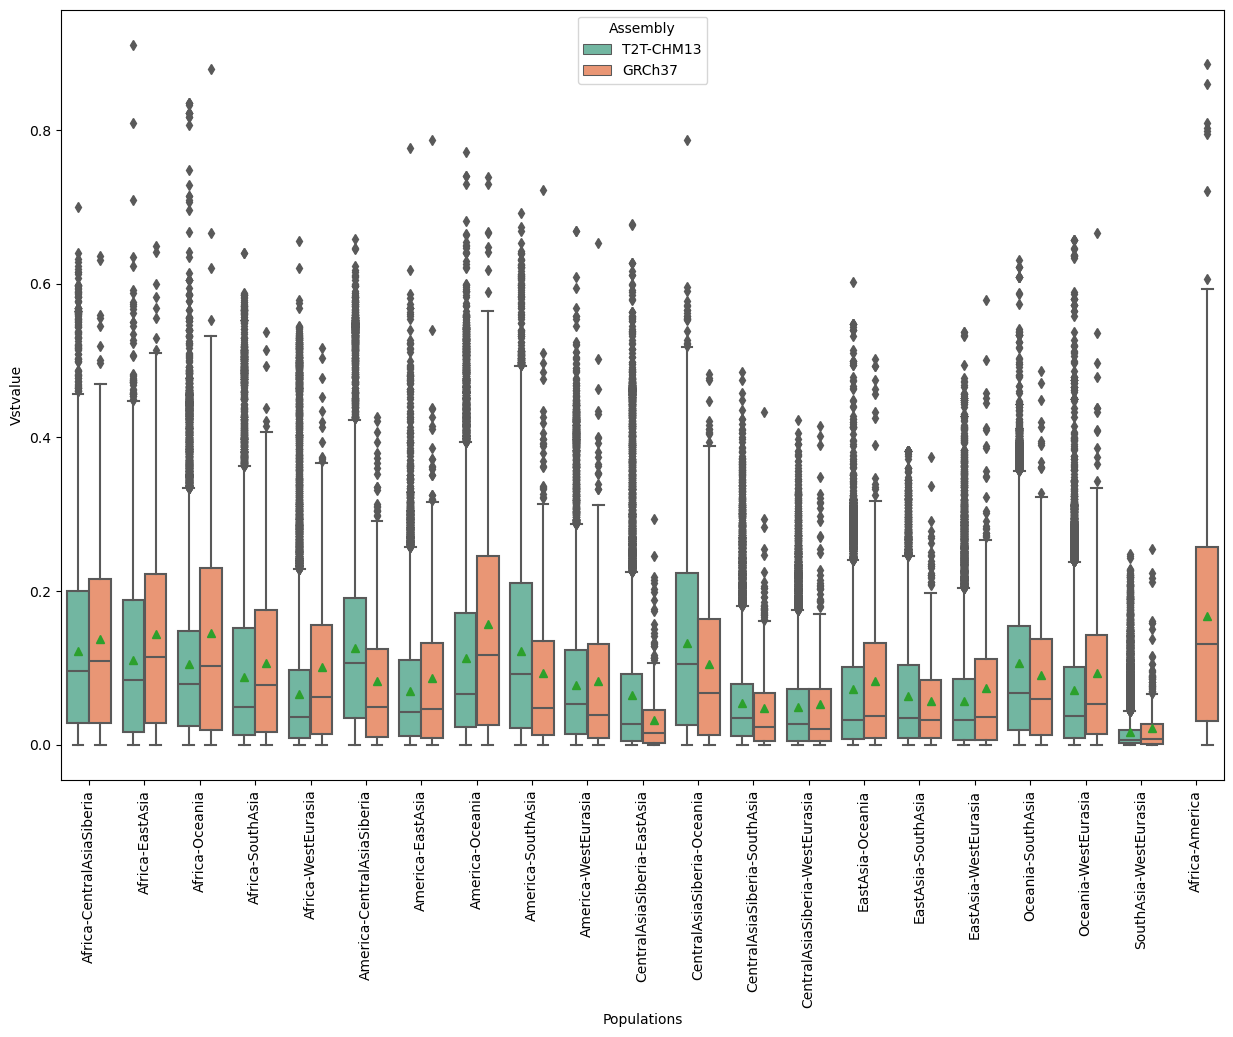

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Populations',y='Vstvalue',data=input_two_anova,hue='Assembly', palette= "Set2", showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.savefig('../plots/distribution_vst_among_assemblies.png', transparent=True)
#sns.boxplot(input_boxplot, rot=90)
